# Lab1


In [11]:
import numpy as np
import maze as mz

## Problem 1: The Maze and the Random Minotaur

### MDP1

In [ ]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

#mz.draw_maze(maze)

### Dynamic Programming 

#### Minotaur can't stay 

In [ ]:
# Create an environment maze
env = mz.Maze(maze, stay = False)

# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0, 6,5)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

In [ ]:
#Plot policy at specific time with minotaur at specific location
#S: Stay, L: Left, R: Right, U: Up, D: down
#Green -> objective, Purple -> minotaur
minotaur_position = (3,3)
env.draw_policy(policy, 17, minotaur_position)

In [ ]:
#Plot graph with probability of exiting the maze
mz.exit_probability(env,method)

#### Minotaur is allowed to stay 

In [ ]:
# Create an environment maze
env = mz.Maze(maze, stay = True)

# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0, 6,5)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

In [ ]:
#Plot policy at specifict time with minotaur at specific location
#S: Stay, L: Left, R: Right, U: Up, D: down
#Green -> objective, Purple -> minotaur
minotaur_position = (3,3)
env.draw_policy(policy, 4, minotaur_position)

In [ ]:
#Plot graph with probability of exiting the maze
mz.exit_probability(env,method)

### Value Iteration

#### Minotaur can't stay 

In [ ]:
# Create an environment maze
env = mz.Maze(maze, stay = False)

# Infinite horizon
# Discount Factor 
gamma   = 29/30 # E[T] = 30 = 1/(1-gamma)
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon)

# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

In [ ]:
#Plot graph with probability of exiting the maze
mz.exit_probability(env,method)

#### Minotaur is allowed to stay 

In [ ]:
# Create an environment maze
env = mz.Maze(maze, stay = True)

# Infinite horizon
# Discount Factor 
gamma   = 29/30 # E[T] = 30 = 1/(1-gamma)
# Accuracy threshold
epsilon = 0.0001
V, policy = mz.value_iteration(env, gamma, epsilon)

# Simulate the shortest path starting from position A
method = 'ValIter'
start  = (0,0, 6,5)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

In [ ]:
#Plot graph with probability of exiting the maze
mz.exit_probability(env,method)

### MDP 2
- Need the keys to leave the maze
- Minotaur can't stay still
- Minoutaur moves towards the player with prob 35%


In [1]:
import numpy as np
import maze2 as mz 
import matplotlib.pyplot as plt

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 5],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
# 5 = position of the keys

# Create an environment maze
env = mz.Maze(maze, stay = False)

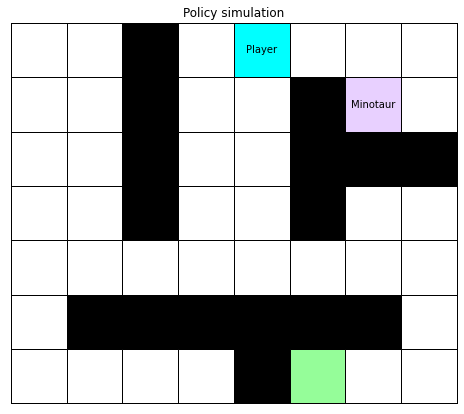

In [5]:
# Check that the new environment behaves as expected

# Infinite horizon
# Discount Factor 
gamma  = 49/50 # E[T] = 50 = 1/(1-gamma)
# Accuracy treshold 
epsilon = 0.0001;
V, policy, Q = mz.value_iteration(env, gamma, epsilon)
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5, 0)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

### Q learning

Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000


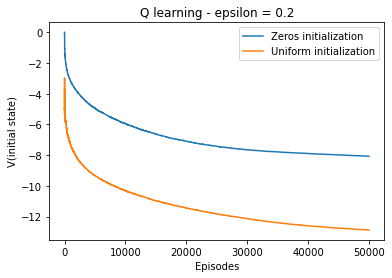

Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000


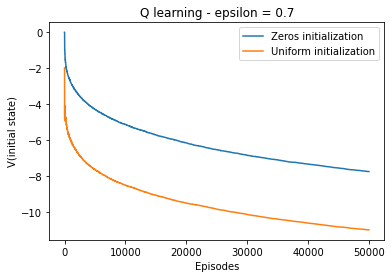

In [5]:
# Q learning - epsilon

# Differernt initializations
Q_zeros = np.zeros((env.n_states,env.n_actions))
Q_unif = - np.random.uniform(1, 10, size =(env.n_states, env.n_actions))

for epsilon in [0.2, 0.7]: 
    _, _, _, V_zeros = mz.q_learning(env, gamma=49/50, n_episodes=50000, epsilon= epsilon, player_state=(0,0,6,5,0), alpha_exponent=2/3, Q_initialization=Q_zeros)
    _, _, _, V_unif = mz.q_learning(env, gamma=49/50, n_episodes=50000, epsilon= epsilon, player_state=(0,0,6,5,0), alpha_exponent=2/3, Q_initialization=Q_unif)
   
    # Plot
    plt.ylabel('V(initial state)')
    plt.xlabel('Episodes')
    plt.title('Q learning - epsilon = '+str(epsilon))
    plt.plot(V_zeros)
    plt.plot(V_unif)
    plt.legend(['Zeros initialization', 'Uniform initialization'])
    plt.show()

Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000


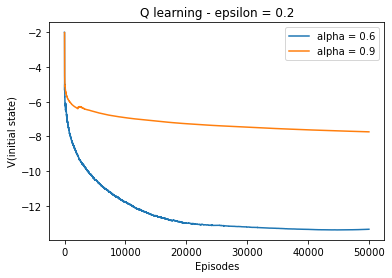

In [17]:
# Q learning - alpha

# Initialization
Q_unif = - np.random.uniform(1, 10, (env.n_states, env.n_actions))

epsilon = 0.2
for alpha in [0.6, 0.9]: 
    _, _, _, V_unif = mz.q_learning(env, gamma=49/50, n_episodes=50000, epsilon= epsilon, player_state=(0,0,6,5,0), alpha_exponent=alpha, Q_initialization=Q_unif)
    plt.plot(V_unif)
    
# Plot
plt.ylabel('V(initial state)')
plt.xlabel('Episodes')
plt.title('Q learning - epsilon = '+str(epsilon))
plt.legend(['alpha = 0.6', 'alpha = 0.9'])
plt.show()


In [ ]:
_, policy, _, _ = mz.q_learning(env, gamma=49/50, n_episodes=50000, epsilon= 0.3, player_state=(0,0,6,5,0), alpha_exponent=2/3)

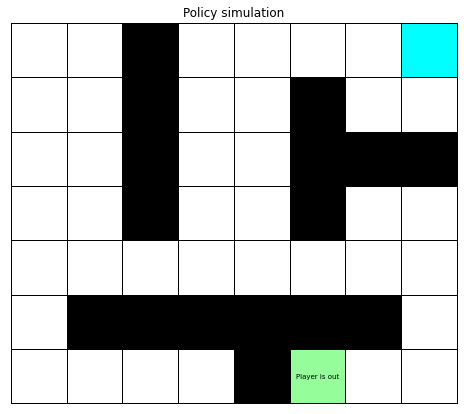

In [22]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5, 0)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

In [13]:
# Probability of leaving the maze using Q-learning policies
_, policy, _, _ = mz.q_learning(env, gamma=49/50, n_episodes=50000, epsilon= 0.3, player_state=(0,0,6,5,0), alpha_exponent=2/3)
prob, time_to_escape = mz.exit_probability(env, policy)
print('Probability of exiting the maze is {}'.format(round(prob*100,2)))
print('Mean time to exiting the maze is {}'.format(time_to_escape))

Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Venom will kill you at time  62
YOU WON at time =  36
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  53
YOU WON at time =  49
Venom will kill you at time  18
YOU'RE DEAD
Venom will kill you at time  43
YOU'RE DEAD
Venom will kill you at time  59
YOU WON at time =  36
Venom will kill you at time  147
YOU WON at time =  34
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  58
YOU WON at time =  30
Venom will kill you at time  50
YOU WON at time =  42
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  39
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  100
YOU WON at time =  53
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  95
YOU WON at time =  52
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time

YOU'RE DEAD
Venom will kill you at time  105
YOU WON at time =  38
Venom will kill you at time  42
YOU'RE DEAD
Venom will kill you at time  53
YOU WON at time =  38
Venom will kill you at time  73
YOU WON at time =  43
Venom will kill you at time  18
YOU'RE DEAD
Venom will kill you at time  27
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  61
YOU WON at time =  43
Venom will kill you at time  45
YOU WON at time =  36
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  70
YOU WON at time =  34
Venom will kill you at time  56
YOU WON at time =  46
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  104
YOU WON at time =  55
Venom will kill you at time  1
YOU WON at time =  32
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  131
YOU WON at time =  36
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  181
YOU WON at time =  46
Venom will kill you at time  20
YOU'RE 

YOU WON at time =  39
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  205
YOU WON at time =  36
Venom will kill you at time  53
YOU WON at time =  38
Venom will kill you at time  157
YOU WON at time =  40
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  109
YOU WON at time =  42
Venom will kill you at time  247
YOU WON at time =  34
Venom will kill you at time  101
YOU WON at time =  36
Venom will kill you at time  152
YOU WON at time =  37
Venom will kill you at time  44
YOU WON at time =  40
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  38
YOU WON at time =  34
Venom will kill you at time  79
YOU WON at time =  54
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  38
Venom will kill you at time  113
YOU WON at time =  52
Venom will kill you a

YOU WON at time =  40
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  113
YOU WON at time =  41
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  68
YOU WON at time =  33
Venom will kill you at time  156
YOU WON at time =  37
Venom will kill you at time  72
YOU WON at time =  38
Venom will kill you at time  190
YOU WON at time =  38
Venom will kill you at time  84
YOU WON at time =  36
Venom will kill you at time  180
YOU WON at time =  42
Venom will kill you at time  85
YOU WON at time =  38
Venom will kill you at time  83
YOU WON at time =  38
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  61
YOU WON at time =  42
Venom will kill you at time  55
YOU WON at time =  44
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  56
YOU WON at time =  45
Venom will kill you at time  47
YOU WON at time =  38
Venom wi

YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  138
YOU WON at time =  30
Venom will kill you at time  1
YOU WON at time =  46
Venom will kill you at time  51
YOU WON at time =  46
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  84
YOU WON at time =  36
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  45
YOU WON at time =  37
Venom will kill you at time  23
YOU'RE DEAD
Venom will kill you at time  45
YOU WON at time =  35
Venom will kill you at time  79
YOU WON at time =  52
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  79
YOU WON at time =  42
Venom will kill you at time  40
YOU'RE DEAD
Venom will kill you at time  159
YOU WON at time =  40
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  99
YOU WON at time =  33
Venom will 

Venom will kill you at time  1
YOU WON at time =  40
Venom will kill you at time  74
YOU WON at time =  35
Venom will kill you at time  51
YOU WON at time =  39
Venom will kill you at time  155
YOU WON at time =  32
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  45
YOU WON at time =  34
Venom will kill you at time  80
YOU WON at time =  32
Venom will kill you at time  47
YOU WON at time =  42
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  59
YOU WON at time =  36
Venom will kill you at time  149
YOU WON at time =  40
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  54
YOU WON at time =  43
Venom will kill you at time  75
YOU WON at time =  36
Venom will kill you at time  118
YOU WON at time =  40
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  95
YOU WON at time =  34
Venom will kill you at time  20
YO

Venom will kill you at time  104
YOU WON at time =  52
Venom will kill you at time  99
YOU WON at time =  34
Venom will kill you at time  49
YOU WON at time =  32
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  68
YOU WON at time =  59
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  53
YOU WON at time =  44
Venom will kill you at time  1
YOU WON at time =  46
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  86
YOU WON at time =  32
Venom will kill you at time  204
YOU WON at time =  32
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  23
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  35
YOU'RE DEAD
Venom will kill you at time  53
YOU WON at time =  35
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  117
Y

YOU'RE DEAD
Venom will kill you at time  75
YOU WON at time =  33
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  43
YOU WON at time =  38
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  50
YOU WON at time =  36
Venom will kill you at time  37
YOU'RE DEAD
Venom will kill you at time  127
YOU WON at time =  34
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  61
YOU WON at time =  38
Venom will kill you at time  18
YOU'RE DEAD
Venom will kill you at time  39
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  53
YOU WON at time =  40
Venom will kill you at time  1
YOU WON at time =  39
Venom will kill you at time  122
YOU WON at time =  34
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  18
YOU'RE DEAD
Venom will kill you at time  2

Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  84
YOU WON at time =  53
Venom will kill you at time  114
YOU WON at time =  33
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  154
YOU WON at time =  38
Venom will kill you at time  64
YOU WON at time =  40
Venom will kill you at time  170
YOU WON at time =  38
Venom will kill you at time  168
YOU WON at time =  50
Venom will kill you at time  160
YOU WON at time =  64
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  173
YOU WON at time =  38
Venom will kill you at time  60
YOU WON at time =  32
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  74
YOU WON at time =  48
Venom will kill you at time  50
YOU WON at time =  44
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  159
YOU WON at time =  40
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD

YOU WON at time =  40
Venom will kill you at time  142
YOU WON at time =  43
Venom will kill you at time  139
YOU WON at time =  42
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  53
YOU WON at time =  44
Venom will kill you at time  43
YOU WON at time =  35
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  93
YOU WON at time =  34
Venom will kill you at time  56
YOU WON at time =  39
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  28
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  121
YOU WON at time =  38
Venom will kill you at time  39
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  86
YOU WON at time =  61
Venom will kill you at time  37
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you

YOU WON at time =  74
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  70
YOU WON at time =  54
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  64
YOU WON at time =  52
Venom will kill you at time  104
YOU WON at time =  36
Venom will kill you at time  33
YOU'RE DEAD
Venom will kill you at time  50
YOU WON at time =  38
Venom will kill you at time  36
YOU'RE DEAD
Venom will kill you at time  51
YOU WON at time =  36
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  27
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  35
YOU'RE DEAD
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  60
YOU WON at time =  47
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  36
YOU'RE D

Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  118
YOU WON at time =  47
Venom will kill you at time  76
YOU WON at time =  35
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  68
YOU WON at time =  37
Venom will kill you at time  42
YOU WON at time =  40
Venom will kill you at time  89
YOU WON at time =  54
Venom will kill you at time  49
YOU WON at time =  39
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  124
YOU WON at time =  50
Venom will kill you at time  49
YOU WON at time =  36
Venom will kill you at time  95
YOU WON at time =  34
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  100
YOU WON at time =  40
Venom will kill you at time  36
YOU'RE DEAD
Venom will kill you at time  327
YOU WON at time =  36
Venom will kill you at time  108
YOU WON at time =  66

Venom will kill you at time  48
YOU WON at time =  38
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  81
YOU WON at time =  52
Venom will kill you at time  93
YOU WON at time =  33
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  30
YOU'RE DEAD
Venom will kill you at time  87
YOU WON at time =  34
Venom will kill you at time  73
YOU WON at time =  39
Venom will kill you at time  54
YOU WON at time =  32
Venom will kill you at time  77
YOU WON at time =  38
Venom will kill you at time  91
YOU WON at time =  49
Venom will kill you at time  61
YOU WON at time =  42
Venom will kill you at time  58
YOU WON at time =  31
Venom will kill you at time  18
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  48
YOU'RE DEAD
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at t

YOU WON at time =  33
Venom will kill you at time  1
YOU WON at time =  32
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  60
YOU WON at time =  32
Venom will kill you at time  108
YOU WON at time =  33
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  129
YOU WON at time =  41
Venom will kill you at time  57
YOU WON at time =  38
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  74
YOU WON at time =  47
Venom will kill you at time  89
YOU WON at time =  49
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  115
YOU WON at time =  71
Venom will kill you at time  168
YOU WON at time =  34
Venom will kill you at time  45
YOU WON at time = 

YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  51
YOU WON at time =  30
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  68
YOU WON at time =  30
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  144
YOU WON at time =  46
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  104
YOU WON at time =  70
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  30
Venom will kill you at time  146
YOU WON at time =  36
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  175
YOU WON at time = 

Venom will kill you at time  191
YOU WON at time =  38
Venom will kill you at time  68
YOU WON at time =  45
Venom will kill you at time  92
YOU WON at time =  67
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  47
YOU WON at time =  44
Venom will kill you at time  184
YOU WON at time =  34
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  368
YOU WON at time =  37
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  46
YOU WON at time =  44
Venom will kill you at time  94
YOU WON at time =  31
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  201
YOU WON at time =  40
Venom will kill you at time  45
YOU WON at time =  37
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  33
YOU'RE DEAD
Venom will kill you at time  83
YOU WON at time =  44
Venom will kill you at time  33
YOU'RE DEAD
Venom will kill you at time  66
YOU WON at time =  3

YOU WON at time =  36
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  99
YOU WON at time =  46
Venom will kill you at time  75
YOU WON at time =  30
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  74
YOU WON at time =  36
Venom will kill you at time  63
YOU WON at time =  33
Venom will kill you at time  167
YOU WON at time =  44
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  44
YOU WON at time =  39
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  91
YOU WON at time =  40
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  246
YOU WON at time =  34
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  58
YOU WON at time =  43
Venom will 

Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  66
YOU WON at time =  39
Venom will kill you at time  111
YOU WON at time =  32
Venom will kill you at time  70
YOU WON at time =  44
Venom will kill you at time  74
YOU WON at time =  52
Venom will kill you at time  56
YOU WON at time =  44
Venom will kill you at time  38
YOU'RE DEAD
Venom will kill you at time  64
YOU WON at time =  34
Venom will kill you at time  56
YOU WON at time =  38
Venom will kill you at time  62
YOU WON at time =  33
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  103
YOU WON at time =  42
Venom will kill you at time  158
YOU WON at time =  40
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  78
YOU WON at time =  32
Venom wil

YOU WON at time =  35
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  41
YOU WON at time =  40
Venom will kill you at time  30
YOU'RE DEAD
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  83
YOU WON at time =  32
Venom will kill you at time  140
YOU WON at time =  48
Venom will kill you at time  56
YOU'RE DEAD
Venom will kill you at time  42
YOU WON at time =  38
Venom will kill you at time  49
YOU WON at time =  39
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  51
YOU WON at time =  30
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  30
YOU'RE DEAD
Venom will kill you at time  78
YOU WON at time =  31
Venom will kill you at time  48
YOU WON at time =  38
Venom will kill you at time  137
YOU WON at time =  40
Venom will kill you at time  63
YOU WON at time =  46
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  47
YOU WON 

Venom will kill you at time  49
YOU WON at time =  30
Venom will kill you at time  23
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  38
YOU WON at time =  33
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  51
YOU WON at time =  34
Venom will kill you at time  60
YOU WON at time =  46
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  37
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  65
YOU WON at time =  30
Venom will kill you at time  40
YOU WON at time =  32
Venom will kill you at time  68
YOU WON at time =  39
Venom will kill you at time  47
YOU WON at time =  37
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  120
YOU WON at time =  49
Venom will kill you at time  60
YOU WON at time =  41
Venom will kill you at

YOU WON at time =  40
Venom will kill you at time  1
YOU WON at time =  43
Venom will kill you at time  40
YOU'RE DEAD
Venom will kill you at time  59
YOU WON at time =  42
Venom will kill you at time  136
YOU WON at time =  51
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  290
YOU WON at time =  38
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  71
YOU WON at time =  41
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  46
YOU WON at time =  33
Venom will kill you at time  94
YOU WON at time =  54
Venom will kill you at time  175
YOU WON at time =  39
Venom will kill you at time  69
YOU WON at time =  34
Venom will kill you at time  1
YOU WON at time =  46
Venom will kill you at time  33
YOU'RE DEAD
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  55
YOU WON at time =  32
Venom will kill you at time  30
YOU'RE DEAD
Venom will kill you at time  3
Y

YOU WON at time =  54
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  55
YOU WON at time =  32
Venom will kill you at time  33
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  65
YOU WON at time =  52
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  50
YOU WON at time =  44
Venom will kill you at time  141
YOU WON at time =  32
Venom will kill you at time  97
YOU WON at time =  52
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  38
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  33
YOU'RE DEAD
Venom will kill you at time  35
YOU'RE DEAD
Venom will kill you at time  61
YOU WON at time =  32
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  143
YOU WON at time =  32
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  33

Venom will kill you at time  104
YOU WON at time =  37
Venom will kill you at time  43
YOU WON at time =  30
Venom will kill you at time  242
YOU WON at time =  32
Venom will kill you at time  56
YOU WON at time =  45
Venom will kill you at time  42
YOU WON at time =  35
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  49
YOU WON at time =  38
Venom will kill you at time  148
YOU WON at time =  32
Venom will kill you at time  314
YOU WON at time =  34
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  40
YOU'RE DEAD
Venom will kill you at time  61
YOU WON at time =  42
Venom will kill you at time  36
YOU'RE DEAD
Venom will kill you at time  47
YOU'RE DEAD
Venom will kill you at time  56
YOU WON at time =  42
Venom will kill y

YOU WON at time =  32
Venom will kill you at time  80
YOU WON at time =  38
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  54
YOU WON at time =  52
Venom will kill you at time  55
YOU'RE DEAD
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  110
YOU WON at time =  32
Venom will kill you at time  125
YOU WON at time =  37
Venom will kill you at time  38
YOU WON at time =  37
Venom will kill you at time  36
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  62
YOU WON at time =  43
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  49
YOU WON at time =  35
Venom will kill you at time  50
YOU WON at time =  37
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill y

YOU WON at time =  38
Venom will kill you at time  1
YOU WON at time =  43
Venom will kill you at time  65
YOU WON at time =  34
Venom will kill you at time  38
YOU'RE DEAD
Venom will kill you at time  63
YOU WON at time =  32
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  40
YOU WON at time =  38
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  72
YOU WON at time =  47
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  143
YOU WON at time =  44
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  83
YOU WON at time =  33
Venom will kill you at time  70
YOU WON at time =  35
Venom will kill you at time  57
YOU WON at time =  38
Venom will

Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  95
YOU WON at time =  37
Venom will kill you at time  45
YOU WON at time =  42
Venom will kill you at time  61
YOU WON at time =  36
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  36
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  169
YOU WON at time =  64
Venom will kill you at time  97
YOU WON at time =  34
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  41
YOU WON at time =  39
Venom will kill you at time  66
YOU WON at time =  40
Venom will kill you at time  72
YOU WON at time =  36
Venom will kill you at time  46
YOU WON at time =  44
Venom will kill you at time  141
YOU WON at time =  33
Venom will kil

YOU WON at time =  42
Venom will kill you at time  83
YOU WON at time =  47
Venom will kill you at time  120
YOU WON at time =  39
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  43
YOU WON at time =  34
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  165
YOU WON at time =  40
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  121
YOU WON at time =  41
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  44
YOU WON at time =  33
Venom will kill you at time  97
YOU WON at time =  34
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  27
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  155
YOU WON at time =  37
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  56
YOU WON at time =  54
Venom will kill you at time  4
YOU'RE DEAD
Venom 

In [9]:
# Probability of leaving the maze using Q-learning policies
_, policy, _, _ = mz.q_learning(env, gamma=49/50, n_episodes=50000, epsilon= 0.3, player_state=(0,0,6,5,0), alpha_exponent=2/3)
prob, time_to_escape = mz.exit_probability(env, policy, venom = False)
print('Probability of exiting the maze is {}'.format(round(prob*100,2)))
print('Mean time to exiting the maze is {}'.format(time_to_escape))

Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
YOU WON at time =  43
YOU WON at time =  58
YOU WON at time =  33
YOU WON at time =  34
YOU WON at time =  52
YOU WON at time =  36
YOU WON at time =  48
YOU WON at time =  43
YOU WON at time =  54
YOU WON at time =  35
YOU WON at time =  38
YOU WON at time =  58
YOU WON at time =  48
YOU WON at time =  41
YOU WON at time =  56
YOU WON at time =  42
YOU WON at time =  34
YOU WON at time =  36
YOU WON at time =  34
YOU WON at time =  41
YOU WON at time =  51
YOU WON at time =  75
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  39
YOU WON at time =  42
YOU WON at time =  45
YOU WON at time =  30
YOU WON at time =  36
YOU WON at time =  43
YOU WON at time =  59
YOU WON at time =  48
YOU WON at time =  40
YOU WON at time =  61
YOU WON at time =  37
YOU WON at time =  44
YOU WON at time =  44
YOU WON at time =  42
YOU WON at time =  83
YOU WON at time =  36
YOU WON at time =  56
YOU WON at time =

YOU WON at time =  36
YOU WON at time =  43
YOU WON at time =  45
YOU WON at time =  60
YOU WON at time =  44
YOU WON at time =  50
YOU WON at time =  50
YOU WON at time =  49
YOU WON at time =  41
YOU WON at time =  40
YOU WON at time =  36
YOU WON at time =  33
YOU WON at time =  36
YOU WON at time =  40
YOU WON at time =  60
YOU WON at time =  57
YOU WON at time =  38
YOU WON at time =  35
YOU WON at time =  50
YOU WON at time =  46
YOU WON at time =  46
YOU WON at time =  34
YOU WON at time =  39
YOU WON at time =  63
YOU WON at time =  40
YOU WON at time =  51
YOU WON at time =  46
YOU WON at time =  41
YOU WON at time =  42
YOU WON at time =  34
YOU WON at time =  42
YOU WON at time =  38
YOU WON at time =  62
YOU WON at time =  33
YOU WON at time =  34
YOU WON at time =  41
YOU WON at time =  46
YOU WON at time =  37
YOU WON at time =  59
YOU WON at time =  48
YOU WON at time =  38
YOU WON at time =  52
YOU WON at time =  54
YOU WON at time =  42
YOU WON at time =  39
YOU WON at

YOU WON at time =  38
YOU WON at time =  32
YOU WON at time =  40
YOU WON at time =  34
YOU WON at time =  38
YOU WON at time =  37
YOU WON at time =  32
YOU WON at time =  32
YOU WON at time =  30
YOU WON at time =  32
YOU WON at time =  47
YOU WON at time =  54
YOU WON at time =  33
YOU WON at time =  34
YOU WON at time =  45
YOU WON at time =  30
YOU WON at time =  51
YOU WON at time =  56
YOU WON at time =  54
YOU WON at time =  54
YOU WON at time =  36
YOU WON at time =  46
YOU WON at time =  36
YOU WON at time =  40
YOU WON at time =  32
YOU WON at time =  39
YOU WON at time =  44
YOU WON at time =  49
YOU'RE DEAD
YOU WON at time =  47
YOU WON at time =  39
YOU WON at time =  41
YOU WON at time =  46
YOU WON at time =  44
YOU WON at time =  31
YOU WON at time =  39
YOU WON at time =  54
YOU WON at time =  43
YOU WON at time =  42
YOU WON at time =  35
YOU WON at time =  37
YOU WON at time =  64
YOU WON at time =  51
YOU'RE DEAD
YOU WON at time =  50
YOU WON at time =  44
YOU WON 

YOU WON at time =  57
YOU WON at time =  53
YOU WON at time =  57
YOU WON at time =  36
YOU WON at time =  52
YOU WON at time =  44
YOU WON at time =  46
YOU WON at time =  70
YOU WON at time =  38
YOU WON at time =  35
YOU WON at time =  46
YOU WON at time =  32
YOU WON at time =  39
YOU WON at time =  48
YOU WON at time =  54
YOU WON at time =  41
YOU WON at time =  40
YOU WON at time =  52
YOU WON at time =  41
YOU WON at time =  40
YOU WON at time =  47
YOU WON at time =  38
YOU WON at time =  74
YOU WON at time =  45
YOU WON at time =  34
YOU WON at time =  57
YOU WON at time =  39
YOU WON at time =  33
YOU WON at time =  56
YOU WON at time =  41
YOU WON at time =  39
YOU WON at time =  32
YOU WON at time =  35
YOU WON at time =  46
YOU WON at time =  76
YOU WON at time =  34
YOU WON at time =  44
YOU WON at time =  42
YOU WON at time =  32
YOU WON at time =  54
YOU WON at time =  40
YOU WON at time =  51
YOU WON at time =  51
YOU WON at time =  32
YOU WON at time =  69
YOU WON at

YOU WON at time =  47
YOU WON at time =  39
YOU WON at time =  36
YOU WON at time =  46
YOU WON at time =  40
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  46
YOU WON at time =  35
YOU WON at time =  41
YOU WON at time =  46
YOU WON at time =  52
YOU WON at time =  40
YOU WON at time =  44
YOU'RE DEAD
YOU WON at time =  50
YOU WON at time =  39
YOU WON at time =  38
YOU WON at time =  39
YOU WON at time =  44
YOU WON at time =  46
YOU WON at time =  42
YOU WON at time =  38
YOU WON at time =  86
YOU WON at time =  38
YOU WON at time =  46
YOU WON at time =  88
YOU WON at time =  30
YOU WON at time =  41
YOU WON at time =  39
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  41
YOU WON at time =  46
YOU WON at time =  36
YOU WON at time =  36
YOU WON at time =  40
YOU WON at time =  34
YOU WON at time =  48
YOU WON at time =  38
YOU WON at time =  45
YOU WON at time =  52
YOU WON at time =  36
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  3

YOU WON at time =  38
YOU WON at time =  39
YOU WON at time =  46
YOU WON at time =  36
YOU WON at time =  44
YOU WON at time =  35
YOU WON at time =  36
YOU WON at time =  63
YOU WON at time =  44
YOU WON at time =  52
YOU WON at time =  36
YOU WON at time =  42
YOU WON at time =  47
YOU WON at time =  58
YOU WON at time =  43
YOU WON at time =  38
YOU WON at time =  46
YOU WON at time =  58
YOU WON at time =  58
YOU WON at time =  39
YOU WON at time =  34
YOU WON at time =  47
YOU WON at time =  42
YOU WON at time =  48
YOU WON at time =  40
YOU WON at time =  59
YOU WON at time =  44
YOU WON at time =  42
YOU WON at time =  48
YOU WON at time =  43
YOU WON at time =  43
YOU WON at time =  44
YOU WON at time =  38
YOU WON at time =  51
YOU WON at time =  36
YOU WON at time =  36
YOU WON at time =  36
YOU WON at time =  44
YOU WON at time =  40
YOU WON at time =  74
YOU WON at time =  56
YOU WON at time =  36
YOU WON at time =  52
YOU WON at time =  48
YOU WON at time =  54
YOU WON at

YOU WON at time =  39
YOU WON at time =  61
YOU WON at time =  46
YOU WON at time =  52
YOU WON at time =  53
YOU WON at time =  37
YOU WON at time =  40
YOU WON at time =  40
YOU WON at time =  41
YOU WON at time =  59
YOU WON at time =  31
YOU WON at time =  49
YOU WON at time =  40
YOU WON at time =  44
YOU WON at time =  47
YOU WON at time =  33
YOU WON at time =  58
YOU WON at time =  33
YOU WON at time =  36
YOU WON at time =  42
YOU WON at time =  43
YOU WON at time =  47
YOU WON at time =  36
YOU WON at time =  48
YOU WON at time =  33
YOU WON at time =  48
YOU WON at time =  46
YOU WON at time =  36
YOU WON at time =  38
YOU WON at time =  41
YOU WON at time =  38
YOU WON at time =  39
YOU WON at time =  41
YOU WON at time =  39
YOU WON at time =  60
YOU WON at time =  36
YOU WON at time =  47
YOU WON at time =  42
YOU WON at time =  41
YOU WON at time =  40
YOU WON at time =  40
YOU WON at time =  35
YOU WON at time =  36
YOU WON at time =  60
YOU WON at time =  41
YOU WON at

YOU WON at time =  50
YOU WON at time =  32
YOU WON at time =  40
YOU WON at time =  40
YOU WON at time =  42
YOU WON at time =  59
YOU WON at time =  63
YOU WON at time =  49
YOU WON at time =  37
YOU WON at time =  44
YOU WON at time =  46
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  57
YOU WON at time =  30
YOU WON at time =  43
YOU WON at time =  47
YOU WON at time =  45
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  92
YOU WON at time =  43
YOU WON at time =  49
YOU WON at time =  33
YOU WON at time =  37
YOU WON at time =  31
YOU WON at time =  39
YOU WON at time =  41
YOU WON at time =  46
YOU WON at time =  32
YOU WON at time =  36
YOU WON at time =  49
YOU WON at time =  44
YOU WON at time =  45
YOU WON at time =  42
YOU WON at time =  88
YOU WON at time =  37
YOU WON at time =  36
YOU WON at time =  66
YOU WON at time =  32
YOU WON at time =  35
YOU WON at time =  39
YOU WON at time =  33
YOU WON at time =  47
YOU WON at time =  62
YOU WON at

YOU WON at time =  42
YOU WON at time =  41
YOU WON at time =  39
YOU WON at time =  33
YOU WON at time =  34
YOU WON at time =  36
YOU WON at time =  43
YOU WON at time =  35
YOU WON at time =  33
YOU WON at time =  47
YOU WON at time =  71
YOU WON at time =  37
YOU WON at time =  50
YOU WON at time =  40
YOU WON at time =  42
YOU WON at time =  48
YOU WON at time =  44
YOU WON at time =  37
YOU WON at time =  50
YOU WON at time =  46
YOU WON at time =  36
YOU WON at time =  32
YOU WON at time =  35
YOU WON at time =  38
YOU WON at time =  34
YOU WON at time =  44
YOU WON at time =  48
YOU WON at time =  44
YOU WON at time =  40
YOU WON at time =  32
YOU WON at time =  35
YOU WON at time =  36
YOU WON at time =  48
YOU WON at time =  46
YOU WON at time =  33
YOU WON at time =  51
YOU WON at time =  49
YOU WON at time =  50
YOU WON at time =  38
YOU WON at time =  43
YOU WON at time =  38
YOU WON at time =  37
YOU WON at time =  52
YOU WON at time =  33
YOU WON at time =  42
YOU WON at

YOU WON at time =  56
YOU WON at time =  44
YOU WON at time =  60
YOU WON at time =  41
YOU WON at time =  30
YOU WON at time =  79
YOU WON at time =  36
YOU WON at time =  56
YOU WON at time =  45
YOU WON at time =  33
YOU WON at time =  55
YOU WON at time =  54
YOU WON at time =  40
YOU WON at time =  45
YOU WON at time =  38
YOU WON at time =  37
YOU WON at time =  38
YOU WON at time =  73
YOU WON at time =  39
YOU WON at time =  67
YOU WON at time =  49
YOU WON at time =  48
YOU WON at time =  35
YOU WON at time =  47
YOU WON at time =  48
YOU WON at time =  40
YOU WON at time =  45
YOU WON at time =  35
YOU WON at time =  34
YOU WON at time =  56
YOU WON at time =  48
YOU WON at time =  33
YOU WON at time =  87
YOU WON at time =  40
YOU WON at time =  33
YOU WON at time =  37
YOU WON at time =  37
YOU WON at time =  61
YOU WON at time =  61
YOU WON at time =  44
YOU WON at time =  32
YOU WON at time =  38
YOU WON at time =  33
YOU WON at time =  43
YOU WON at time =  36
YOU WON at

YOU WON at time =  35
YOU WON at time =  35
YOU WON at time =  49
YOU WON at time =  41
YOU WON at time =  42
YOU WON at time =  34
YOU WON at time =  38
YOU WON at time =  37
YOU WON at time =  30
YOU WON at time =  38
YOU WON at time =  35
YOU WON at time =  60
YOU WON at time =  36
YOU WON at time =  54
YOU WON at time =  58
YOU WON at time =  50
YOU WON at time =  42
YOU WON at time =  52
YOU WON at time =  78
YOU WON at time =  62
YOU WON at time =  58
YOU WON at time =  65
YOU WON at time =  34
YOU WON at time =  56
YOU WON at time =  33
YOU WON at time =  36
YOU WON at time =  66
YOU WON at time =  34
YOU WON at time =  44
YOU WON at time =  34
YOU WON at time =  32
YOU WON at time =  40
YOU WON at time =  43
YOU WON at time =  39
YOU WON at time =  50
YOU WON at time =  52
YOU WON at time =  42
YOU WON at time =  34
YOU WON at time =  33
YOU WON at time =  44
YOU WON at time =  37
YOU WON at time =  56
YOU WON at time =  34
YOU WON at time =  43
YOU WON at time =  42
YOU WON at

YOU WON at time =  46
YOU WON at time =  38
YOU WON at time =  43
YOU WON at time =  39
YOU WON at time =  34
YOU'RE DEAD
YOU WON at time =  42
YOU WON at time =  56
YOU WON at time =  44
YOU WON at time =  55
YOU WON at time =  38
YOU WON at time =  40
YOU WON at time =  61
YOU WON at time =  42
YOU WON at time =  58
YOU WON at time =  41
YOU WON at time =  58
YOU WON at time =  41
YOU WON at time =  40
YOU WON at time =  32
YOU WON at time =  50
YOU WON at time =  31
YOU WON at time =  39
YOU WON at time =  38
YOU WON at time =  44
YOU WON at time =  40
YOU WON at time =  35
YOU WON at time =  38
YOU WON at time =  39
YOU WON at time =  42
YOU WON at time =  48
YOU WON at time =  37
YOU WON at time =  36
YOU WON at time =  45
YOU WON at time =  47
YOU WON at time =  33
YOU WON at time =  40
YOU WON at time =  39
YOU WON at time =  41
YOU WON at time =  40
YOU WON at time =  38
YOU WON at time =  39
YOU WON at time =  36
YOU WON at time =  41
YOU WON at time =  50
YOU WON at time =  3

YOU WON at time =  54
YOU WON at time =  34
YOU WON at time =  55
YOU WON at time =  36
YOU WON at time =  49
YOU WON at time =  31
YOU WON at time =  50
YOU WON at time =  64
YOU WON at time =  32
YOU WON at time =  56
YOU WON at time =  70
YOU WON at time =  46
YOU WON at time =  33
YOU WON at time =  51
YOU WON at time =  57
YOU WON at time =  39
YOU WON at time =  39
YOU WON at time =  32
YOU WON at time =  33
YOU WON at time =  52
YOU WON at time =  40
YOU WON at time =  35
YOU WON at time =  40
YOU WON at time =  42
YOU WON at time =  44
YOU WON at time =  33
YOU WON at time =  53
YOU WON at time =  50
YOU WON at time =  36
YOU WON at time =  38
YOU WON at time =  35
YOU WON at time =  35
YOU WON at time =  36
YOU WON at time =  37
YOU WON at time =  38
YOU WON at time =  33
YOU WON at time =  36
YOU WON at time =  32
YOU WON at time =  74
YOU WON at time =  48
YOU WON at time =  34
YOU WON at time =  57
YOU WON at time =  33
YOU WON at time =  34
YOU WON at time =  32
YOU WON at

YOU WON at time =  40
YOU WON at time =  41
YOU WON at time =  55
YOU WON at time =  36
YOU WON at time =  39
YOU WON at time =  66
YOU WON at time =  50
YOU WON at time =  34
YOU WON at time =  33
YOU WON at time =  38
YOU WON at time =  32
YOU WON at time =  47
YOU WON at time =  51
YOU WON at time =  37
YOU WON at time =  48
YOU WON at time =  66
YOU WON at time =  66
YOU WON at time =  56
YOU WON at time =  63
YOU WON at time =  37
YOU WON at time =  34
YOU WON at time =  45
YOU WON at time =  42
YOU WON at time =  55
YOU WON at time =  41
YOU WON at time =  44
YOU WON at time =  62
YOU WON at time =  76
YOU WON at time =  31
YOU WON at time =  51
YOU WON at time =  55
YOU WON at time =  38
YOU WON at time =  33
YOU WON at time =  81
YOU WON at time =  38
YOU WON at time =  34
YOU WON at time =  36
YOU WON at time =  38
YOU WON at time =  71
YOU WON at time =  75
YOU WON at time =  34
YOU WON at time =  39
YOU WON at time =  37
YOU WON at time =  40
YOU WON at time =  35
YOU WON at

YOU WON at time =  56
YOU WON at time =  40
YOU WON at time =  42
YOU WON at time =  44
YOU WON at time =  46
YOU WON at time =  48
YOU WON at time =  54
YOU WON at time =  40
YOU WON at time =  61
YOU WON at time =  51
YOU WON at time =  41
YOU WON at time =  35
YOU WON at time =  39
YOU WON at time =  60
YOU WON at time =  48
YOU WON at time =  52
YOU WON at time =  52
YOU WON at time =  43
YOU WON at time =  43
YOU WON at time =  41
YOU WON at time =  40
YOU WON at time =  36
YOU WON at time =  52
YOU WON at time =  55
YOU WON at time =  65
YOU WON at time =  48
YOU WON at time =  60
YOU WON at time =  32
YOU WON at time =  46
YOU WON at time =  45
YOU WON at time =  75
YOU WON at time =  43
YOU WON at time =  47
YOU WON at time =  33
YOU WON at time =  37
YOU WON at time =  38
YOU WON at time =  56
YOU WON at time =  42
YOU WON at time =  35
YOU WON at time =  48
YOU WON at time =  37
YOU WON at time =  67
YOU WON at time =  53
YOU WON at time =  49
YOU WON at time =  50
YOU WON at

YOU WON at time =  84
YOU WON at time =  42
YOU WON at time =  42
YOU WON at time =  31
YOU WON at time =  44
YOU WON at time =  44
YOU WON at time =  49
YOU WON at time =  41
YOU WON at time =  36
YOU WON at time =  30
YOU WON at time =  39
YOU WON at time =  39
YOU WON at time =  77
YOU WON at time =  46
YOU WON at time =  38
YOU WON at time =  42
YOU WON at time =  50
YOU WON at time =  40
YOU WON at time =  40
YOU WON at time =  36
YOU WON at time =  40
YOU WON at time =  43
YOU WON at time =  45
YOU'RE DEAD
YOU WON at time =  46
YOU WON at time =  46
YOU WON at time =  34
YOU WON at time =  48
YOU WON at time =  50
YOU WON at time =  32
YOU WON at time =  45
YOU WON at time =  59
YOU WON at time =  39
YOU WON at time =  48
YOU WON at time =  36
YOU WON at time =  42
YOU WON at time =  37
YOU WON at time =  36
YOU WON at time =  48
YOU WON at time =  45
YOU WON at time =  47
YOU WON at time =  31
YOU WON at time =  37
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  4

YOU WON at time =  65
YOU WON at time =  40
YOU WON at time =  64
YOU WON at time =  50
YOU WON at time =  36
YOU WON at time =  46
YOU WON at time =  51
YOU WON at time =  34
YOU WON at time =  44
YOU WON at time =  30
YOU WON at time =  42
YOU WON at time =  33
YOU WON at time =  41
YOU WON at time =  39
YOU WON at time =  41
YOU'RE DEAD
YOU WON at time =  43
YOU WON at time =  62
YOU WON at time =  40
YOU WON at time =  42
YOU WON at time =  39
YOU WON at time =  33
YOU WON at time =  50
YOU WON at time =  64
YOU WON at time =  37
YOU WON at time =  54
YOU WON at time =  41
YOU WON at time =  35
YOU WON at time =  40
YOU WON at time =  43
YOU WON at time =  43
YOU WON at time =  32
YOU WON at time =  43
YOU WON at time =  51
YOU WON at time =  55
YOU WON at time =  38
YOU WON at time =  49
YOU WON at time =  54
YOU WON at time =  47
YOU WON at time =  47
YOU WON at time =  30
YOU WON at time =  44
YOU WON at time =  48
YOU WON at time =  41
YOU WON at time =  36
YOU WON at time =  4

### SARSA 

Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000


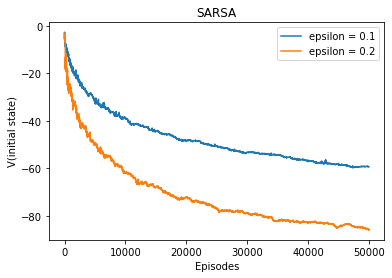

In [3]:
# SARSA with two different epsilon values

Q_unif = - np.random.uniform(1, 10, (env.n_states, env.n_actions))

for epsilon in [0.1,0.2]:
    _, policy, _, value_list = mz.sarsa(env, gamma=49/50, n_episodes=50000, epsilon_in= epsilon, player_state=(0,0,6,5,0), alpha_exponent=2/3, Q_initialization=Q_unif)

    plt.plot(value_list)

# Plot
plt.ylabel('V(initial state)')
plt.xlabel('Episodes')
plt.title('SARSA')
plt.legend(['epsilon = 0.1', 'epsilon = 0.2'])
plt.show()


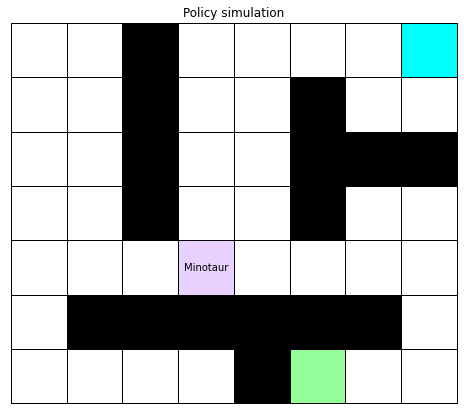

In [4]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5, 0)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000


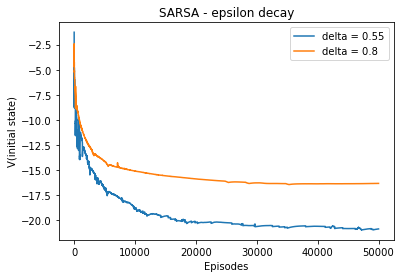

In [14]:
# SARSA with decaying epsilon according to a constant delta

Q_unif = - np.random.uniform(1, 10, (env.n_states, env.n_actions))

for delta in [0.55,0.8]:
    _, policy, _, value_list = mz.sarsa(env, gamma=49/50, n_episodes=50000, epsilon_decay = True, delta = delta, player_state=(0,0,6,5,0), alpha_exponent=2/3, Q_initialization=Q_unif)
    plt.plot(value_list)

# Plot
plt.ylabel('V(initial state)')
plt.xlabel('Episodes')
plt.title('SARSA - epsilon decay')
plt.legend(['delta = 0.55', 'delta = 0.8'])
plt.show()

In [10]:
_, policy, _, value_list = mz.sarsa(env, gamma=49/50, n_episodes=50000, epsilon_decay = True, delta = 0.55, player_state=(0,0,6,5,0), alpha_exponent=2/3)
    

Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000


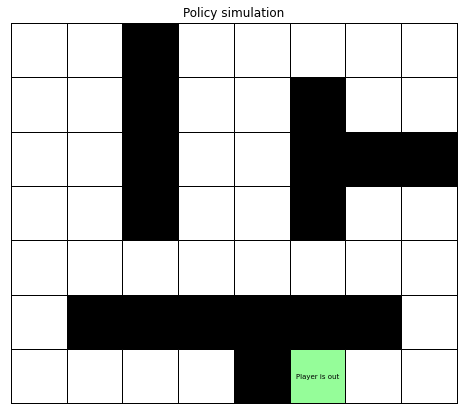

In [13]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5, 0)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

In [11]:
# Probability of leaving the maze using SARSA policies
_, policy, _, _ = mz.sarsa(env, gamma=49/50, n_episodes=50000, epsilon_decay = True, delta = 0.55, player_state=(0,0,6,5,0), alpha_exponent=2/3)
prob, time_to_escape = mz.exit_probability(env, policy)
print('Probability of exiting the maze is {}'.format(round(prob*100,2)))
print('Mean time to exiting the maze is {}'.format(time_to_escape))

Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Venom will kill you at time  47
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  61
YOU WON at time =  56
Venom will kill you at time  41
YOU'RE DEAD
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  42
YOU WON at time =  32
Venom will kill you at time  37
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  80
YOU WON at time =  44
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  102
YOU WON at time =  44
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  57
YOU WON at time =  56
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  37
YOU WON

YOU WON at time =  48
Venom will kill you at time  61
YOU WON at time =  40
Venom will kill you at time  1
YOU WON at time =  41
Venom will kill you at time  50
YOU WON at time =  34
Venom will kill you at time  23
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  77
YOU WON at time =  36
Venom will kill you at time  64
YOU WON at time =  30
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  43
YOU WON at time =  39
Venom will kill you at time  1
YOU WON at time =  48
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  89
YOU WON at time =  58
Venom will kill you at time  84
YOU WON at time =  48
Venom will kill you at time  41
YOU'RE DEAD
Venom will kill you at time  40
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  27
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  76
YOU WON at time =  42
Ve

Venom will kill you at time  23
YOU'RE DEAD
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  41
YOU WON at time =  37
Venom will kill you at time  46
YOU'RE DEAD
Venom will kill you at time  108
YOU WON at time =  38
Venom will kill you at time  50
YOU WON at time =  36
Venom will kill you at time  46
YOU WON at time =  40
Venom will kill you at time  91
YOU WON at time =  46
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  18
YOU'RE DEAD
Venom will kill you at time  57
YOU WON at time =  40
Venom will kill you at time  62
YOU WON at time =  34
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  77
YOU WON at time =  38
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  74
YOU WON at 

YOU'RE DEAD
Venom will kill you at time  104
YOU WON at time =  48
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  107
YOU WON at time =  47
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  69
YOU WON at time =  42
Venom will kill you at time  100
YOU WON at time =  38
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  206
YOU WON at time =  34
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  66
YOU WON at time =  42
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  80
YOU WON at time =  48
Venom will kill you at time  131
YOU WON at time =  55
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time

Venom will kill you at time  36
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  158
YOU WON at time =  49
Venom will kill you at time  95
YOU WON at time =  64
Venom will kill you at time  46
YOU'RE DEAD
Venom will kill you at time  92
YOU WON at time =  44
Venom will kill you at time  78
YOU WON at time =  46
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  40
YOU'RE DEAD
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  169
YOU WON at time =  40
Venom will kill you at time  53
YOU WON at time =  48
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  66
YOU WON at time =  32
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  57
YOU WON at time =  40

YOU WON at time =  42
Venom will kill you at time  43
YOU WON at time =  40
Venom will kill you at time  27
YOU'RE DEAD
Venom will kill you at time  96
YOU WON at time =  54
Venom will kill you at time  1
YOU WON at time =  50
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  35
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  60
YOU WON at time =  42
Venom will kill you at time  124
YOU WON at time =  40
Venom will kill you at time  57
YOU WON at time =  49
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  59
YOU WON at time =  42
Venom will kill you at time  103
YOU WON at time =  48
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  45
YOU WON at time =  34
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  104
YOU WON at time =  

Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  47
YOU WON at time =  41
Venom will kill you at time  69
YOU WON at time =  64
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  112
YOU WON at time =  48
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  56
YOU WON at time =  42
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  239
YOU WON at time =  36
Venom will kill you at time  130
YOU WON at time =  37
Venom will kill you at time  64
YOU WON at time =  50
Venom will kill you at time  45
YOU'RE DEAD
Venom will kill you at time  180
YOU WON at time =  35
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  92
YOU WON at time =  38
Venom will kill you at time  60
YOU WON at time =  56
Venom will kill you at time  106
YOU WON at time =  50
Venom will kill you at time  28
YOU'RE DEAD
Venom will kill you at time  50
YOU WON at time =  34

YOU WON at time =  38
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  37
YOU'RE DEAD
Venom will kill you at time  99
YOU WON at time =  42
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  76
YOU WON at time =  36
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  44
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  46
YOU WON at time =  44
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  64
YOU WON at time =  52
Venom will kill you at time  28
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  66
YOU WON at time =  44
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  37
YOU WON at time =  32
Venom will kill you at time  153
YOU

Venom will kill you at time  65
YOU WON at time =  44
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  83
YOU WON at time =  44
Venom will kill you at time  60
YOU WON at time =  46
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  28
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  54
YOU WON at time =  47
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  58
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  38
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  71
YOU WON at time =  47
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  49
YOU WON at time =  48
Venom will kil

YOU WON at time =  48
Venom will kill you at time  68
YOU WON at time =  58
Venom will kill you at time  102
YOU WON at time =  44
Venom will kill you at time  76
YOU WON at time =  60
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  124
YOU WON at time =  45
Venom will kill you at time  59
YOU WON at time =  44
Venom will kill you at time  86
YOU WON at time =  48
Venom will kill you at time  27
YOU'RE DEAD
Venom will kill you at time  245
YOU WON at time =  34
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  103
YOU WON at time =  48
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  51
YOU'RE DEAD
Venom will kill you at time  60
YOU WON at time =  40
Venom will kill you at time  1
YOU WON at time = 

YOU WON at time =  56
Venom will kill you at time  44
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  39
Venom will kill you at time  88
YOU WON at time =  50
Venom will kill you at time  103
YOU WON at time =  48
Venom will kill you at time  56
YOU WON at time =  32
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  53
Venom will kill you at time  122
YOU WON at time =  38
Venom will kill you at time  112
YOU WON at time =  34
Venom will kill you at time  147
YOU WON at time =  59
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  42
YOU'RE DEAD
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill yo

Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  52
YOU WON at time =  48
Venom will kill you at time  47
YOU'RE DEAD
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  48
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  83
YOU WON at time =  46
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  147
YOU WON at time =  40
Venom will kill you at time  30
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  132
YOU WON at time =  37
Venom will kill you at time  178
YOU WON at time =  34
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  48
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  81
YOU WON at time =  48
Venom will kill you at time  71
YOU WON at time = 

Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  208
YOU WON at time =  38
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  44
YOU'RE DEAD
Venom will kill you at time  35
YOU'RE DEAD
Venom will kill you at time  44
YOU'RE DEAD
Venom will kill you at time  43
YOU'RE DEAD
Venom will kill you at time  43
YOU'RE DEAD
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  44
Venom will kill you at time  38
YOU'RE DEAD
Venom will kill you at time  52
YOU WON at time =  44
Venom will kill you at time  130
YOU WON at time =  40
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  228
YOU WON at time =  63
Venom will kill you at time  1
YOU WON at time =  40
Venom will kill you at time  102
YOU WON at time =  48
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  53
YOU WON at time =  

YOU WON at time =  38
Venom will kill you at time  54
YOU WON at time =  36
Venom will kill you at time  89
YOU WON at time =  52
Venom will kill you at time  97
YOU WON at time =  96
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  86
YOU WON at time =  48
Venom will kill you at time  153
YOU WON at time =  46
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  87
YOU WON at time =  52
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  28
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  69
YOU WON at time =  36
Venom will kill you at time  

YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  97
YOU WON at time =  50
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  40
YOU'RE DEAD
Venom will kill you at time  55
YOU WON at time =  40
Venom will kill you at time  121
YOU WON at time =  36
Venom will kill you at time  68
YOU WON at time =  40
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  44
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  36
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  124
YOU WON at time =  38
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  30
YOU'RE DEAD
Venom will kill you at time  51
YOU WON at time =  40
Venom will kill you at time  42
YOU WON at time =  38
Venom will kill you at time  59
YOU WON at time =  52
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time 

YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  107
YOU WON at time =  54
Venom will kill you at time  23
YOU'RE DEAD
Venom will kill you at time  30
YOU'RE DEAD
Venom will kill you at time  79
YOU WON at time =  48
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  55
YOU WON at time =  42
Venom will kill you at time  87
YOU WON at time =  48
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  71
YOU WON at time =  49
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  98
YOU WON at time =  48
Venom will kill you at time  37
YOU'RE DEAD
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  73
YOU WON at time =  46
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  60
YOU WON at time =  48
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  3
YO

YOU'RE DEAD
Venom will kill you at time  43
YOU WON at time =  36
Venom will kill you at time  38
YOU WON at time =  34
Venom will kill you at time  88
YOU WON at time =  50
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  35
YOU'RE DEAD
Venom will kill you at time  30
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  158
YOU WON at time =  40
Venom will kill you at time  146
YOU WON at time =  53
Venom will kill you at time  116
YOU WON at time =  48
Venom will kill you at time  37
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  69
YOU WON at time =  43
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  68
YOU WON at time =  44
Venom will kill you at time  

Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  19
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  40
YOU'RE DEAD
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  28
YOU'RE DEAD
Venom will kill you at time  60
YOU WON at time =  38
Venom will kill you at time  67
YOU WON at time =  41
Venom will kill you at time  56
YOU WON at time =  44
Venom will kill you at time  70
YOU WON at time =  48
Venom will kill you at time  250
YOU WON at time =  42
Venom will kill you at time  132
YOU WON at time =  86
Venom will kill you at time  67
YOU'RE DEAD
Venom will kill you at time  28
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  27
YOU'RE DEAD
Venom will kill

YOU'RE DEAD
Venom will kill you at time  161
YOU WON at time =  46
Venom will kill you at time  44
YOU WON at time =  42
Venom will kill you at time  79
YOU WON at time =  38
Venom will kill you at time  67
YOU WON at time =  34
Venom will kill you at time  79
YOU WON at time =  46
Venom will kill you at time  84
YOU WON at time =  68
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  106
YOU WON at time =  56
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  75
YOU WON at time =  43
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  44
YOU WON at time =  34
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  59
YOU WON at time =  36
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  181
YOU WON at time =  54
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  97
YOU WON at time =  54
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  3

Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  123
YOU WON at time =  34
Venom will kill you at time  73
YOU WON at time =  44
Venom will kill you at time  223
YOU WON at time =  56
Venom will kill you at time  99
YOU WON at time =  49
Venom will kill you at time  40
YOU'RE DEAD
Venom will kill you at time  94
YOU WON at time =  43
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  53
YOU WON at time =  50
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  149
YOU WON at time =  42
Venom will kill you at time  51
YOU WON at time =  46
Venom will kill you at time  65
YOU WON at time =  36
Venom will kill you at time  99
YOU WON at time =  47
Venom will kill you at time  52
YOU WON at time =  35
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  24
YOU'RE DEAD
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  33
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom wil

YOU WON at time =  44
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  77
YOU WON at time =  36
Venom will kill you at time  179
YOU WON at time =  58
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  92
YOU WON at time =  34
Venom will kill you at time  28
YOU'RE DEAD
Venom will kill you at time  44
YOU'RE DEAD
Venom will kill you at time  43
YOU WON at time =  34
Venom will kill you at time  122
YOU WON at time =  38
Venom will kill you at time  122
YOU WON at time =  46
Venom will kill you at time  23
YOU'RE DEAD
Venom will kill you at time  113
YOU WON at time =  48
Venom will kill you at time  53
YOU WON at time =  42
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  35
YOU'RE DEAD
Venom will kill you at time  68
YOU WON at time =  38
Venom w

YOU'RE DEAD
Venom will kill you at time  58
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  72
YOU WON at time =  44
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  58
YOU WON at time =  38
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  43
YOU'RE DEAD
Venom will kill you at time  74
YOU WON at time =  52
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  31
YOU'RE DEAD
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  102
YOU WON at time =  48
Venom will kill you at time  23
YOU'RE DEAD
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  130
YOU WON at time =  40
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill y

YOU WON at time =  46
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  91
YOU WON at time =  42
Venom will kill you at time  84
YOU WON at time =  35
Venom will kill you at time  190
YOU WON at time =  46
Venom will kill you at time  27
YOU'RE DEAD
Venom will kill you at time  116
YOU WON at time =  54
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  33
YOU'RE DEAD
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  38
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  58
YOU WON at time =  40
Venom will kill you at time  48
YOU WON at time =  42
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  37
Y

YOU WON at time =  52
Venom will kill you at time  51
YOU'RE DEAD
Venom will kill you at time  27
YOU'RE DEAD
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  146
YOU WON at time =  48
Venom will kill you at time  137
YOU WON at time =  64
Venom will kill you at time  72
YOU WON at time =  44
Venom will kill you at time  48
YOU WON at time =  40
Venom will kill you at time  55
YOU WON at time =  38
Venom will kill you at time  45
YOU'RE DEAD
Venom will kill you at time  62
YOU WON at time =  40
Venom will kill you at time  55
YOU WON at time =  40
Venom will kill you at time  70
YOU WON at time =  44
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  62
YOU WON at time =  50
Venom will kill you at time  63
YOU WON at time =  58
Venom will kill you at time  34
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  18
YOU'RE DEA

YOU'RE DEAD
Venom will kill you at time  63
YOU WON at time =  48
Venom will kill you at time  25
YOU'RE DEAD
Venom will kill you at time  79
YOU WON at time =  48
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  33
YOU'RE DEAD
Venom will kill you at time  35
YOU'RE DEAD
Venom will kill you at time  27
YOU'RE DEAD
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  60
YOU WON at time =  58
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  63
YOU WON at time =  44
Venom will kill you at time  17
YOU'RE DEAD
Venom will kill you at time  86
YOU WON at time =  50
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  18
YOU'RE DEAD
Venom will kill you at time  29
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  26
YOU'RE DEAD
Venom will kill yo

Venom will kill you at time  60
YOU WON at time =  40
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  40
YOU'RE DEAD
Venom will kill you at time  78
YOU WON at time =  48
Venom will kill you at time  40
YOU'RE DEAD
Venom will kill you at time  28
YOU'RE DEAD
Venom will kill you at time  44
YOU WON at time =  38
Venom will kill you at time  41
YOU WON at time =  34
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  21
YOU'RE DEAD
Venom will kill you at time  73
YOU WON at time =  41
Venom will kill you at time  18
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  74
YOU'RE DEAD
Venom will kill you at time  56
YOU'RE DEAD
Venom will kill you at time  109
YOU WON at time =  46
Venom will kill you at time  150
YOU WON at time =  46
Venom will kill you at time  77
YOU WON at time =  46
Venom will kill you at time  39
YOU'RE DE

YOU'RE DEAD
Venom will kill you at time  32
YOU'RE DEAD
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  22
YOU'RE DEAD
Venom will kill you at time  62
YOU WON at time =  40
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  61
YOU WON at time =  36
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  51
YOU'RE DEAD
Venom will kill you at time  52
YOU WON at time =  33
Venom will kill you at time  68
YOU WON at time =  38
Venom will kill you at time  36
YOU'RE DEAD
Venom will kill you at time  20
YOU'RE DEAD
Venom will kill you at time  50
YOU WON at time =  41
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  41
YOU'RE DEAD
Venom will kill you at time  51
YOU WON at time =  36
Venom will kill you at time  10
YOU'RE DEAD
Venom w

In [12]:
# Probability of leaving the maze using SARSA policies
_, policy, _, _ = mz.sarsa(env, gamma=49/50, n_episodes=50000, epsilon_decay = True, delta = 0.55, player_state=(0,0,6,5,0), alpha_exponent=2/3)
prob, time_to_escape = mz.exit_probability(env, policy, venom = False)
print('Probability of exiting the maze is {}'.format(round(prob*100,2)))
print('Mean time to exiting the maze is {}'.format(time_to_escape))

Iteration  0
Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
YOU WON at time =  43
YOU WON at time =  43
YOU WON at time =  59
YOU WON at time =  45
YOU WON at time =  44
YOU WON at time =  38
YOU WON at time =  84
YOU WON at time =  40
YOU WON at time =  39
YOU WON at time =  37
YOU WON at time =  42
YOU WON at time =  43
YOU WON at time =  36
YOU WON at time =  32
YOU WON at time =  46
YOU WON at time =  41
YOU WON at time =  33
YOU WON at time =  37
YOU WON at time =  52
YOU WON at time =  44
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  48
YOU WON at time =  48
YOU WON at time =  50
YOU WON at time =  47
YOU WON at time =  44
YOU WON at time =  31
YOU WON at time =  40
YOU WON at time =  42
YOU WON at time =  56
YOU WON at time =  42
YOU WON at time =  54
YOU WON at time =  45
YOU WON at time =  36
YOU WON at time =  48
YOU WON at time =  44
YOU WON at time =  53
YOU WON at time =  58
YOU WON at time =  44
YOU WON at time =  40
YOU WON at time =

YOU WON at time =  48
YOU WON at time =  46
YOU WON at time =  44
YOU WON at time =  39
YOU WON at time =  54
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  42
YOU WON at time =  30
YOU WON at time =  147
YOU WON at time =  36
YOU WON at time =  42
YOU WON at time =  50
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  50
YOU WON at time =  46
YOU WON at time =  37
YOU WON at time =  46
YOU WON at time =  40
YOU WON at time =  44
YOU WON at time =  41
YOU WON at time =  44
YOU WON at time =  40
YOU WON at time =  39
YOU WON at time =  48
YOU WON at time =  40
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  54
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  41
YOU WON at time =  42
YOU WON at time =  48
YOU WON at time =  54
YOU WON at time =  40
YOU WON at time =  39
YOU WON at time =  39
YOU WON at time =  123
YOU WON at time =  42
YOU WON at time =  43
YOU WON at time =  35
YOU WON at time =  49
YOU WON at time =  38
YOU WON 

YOU WON at time =  40
YOU WON at time =  34
YOU WON at time =  49
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  40
YOU WON at time =  52
YOU WON at time =  40
YOU WON at time =  43
YOU WON at time =  40
YOU WON at time =  50
YOU WON at time =  40
YOU WON at time =  47
YOU WON at time =  64
YOU WON at time =  48
YOU WON at time =  44
YOU WON at time =  38
YOU WON at time =  48
YOU WON at time =  42
YOU WON at time =  41
YOU WON at time =  42
YOU WON at time =  44
YOU WON at time =  39
YOU WON at time =  43
YOU WON at time =  35
YOU WON at time =  50
YOU WON at time =  36
YOU WON at time =  61
YOU WON at time =  38
YOU WON at time =  56
YOU WON at time =  57
YOU WON at time =  43
YOU WON at time =  56
YOU WON at time =  36
YOU WON at time =  48
YOU WON at time =  43
YOU WON at time =  42
YOU WON at time =  39
YOU WON at time =  43
YOU WON at time =  39
YOU WON at time =  53
YOU WON at time =  39
YOU WON at time =  39
YOU WON at time =  43
YOU WON at time =  46
YOU WON at

YOU WON at time =  47
YOU WON at time =  35
YOU WON at time =  40
YOU WON at time =  41
YOU WON at time =  48
YOU WON at time =  36
YOU WON at time =  50
YOU WON at time =  33
YOU WON at time =  40
YOU WON at time =  43
YOU WON at time =  38
YOU WON at time =  46
YOU WON at time =  44
YOU WON at time =  70
YOU WON at time =  44
YOU WON at time =  39
YOU WON at time =  46
YOU WON at time =  37
YOU WON at time =  44
YOU WON at time =  36
YOU WON at time =  42
YOU WON at time =  50
YOU WON at time =  40
YOU WON at time =  44
YOU WON at time =  42
YOU WON at time =  35
YOU WON at time =  46
YOU WON at time =  46
YOU WON at time =  38
YOU WON at time =  44
YOU WON at time =  49
YOU WON at time =  50
YOU WON at time =  38
YOU WON at time =  40
YOU WON at time =  46
YOU WON at time =  46
YOU WON at time =  39
YOU WON at time =  35
YOU WON at time =  40
YOU WON at time =  54
YOU WON at time =  34
YOU WON at time =  48
YOU WON at time =  40
YOU WON at time =  40
YOU WON at time =  73
YOU WON at

YOU WON at time =  45
YOU WON at time =  33
YOU WON at time =  52
YOU WON at time =  48
YOU WON at time =  48
YOU WON at time =  45
YOU WON at time =  41
YOU WON at time =  34
YOU WON at time =  47
YOU WON at time =  51
YOU WON at time =  40
YOU WON at time =  38
YOU WON at time =  44
YOU WON at time =  42
YOU WON at time =  43
YOU WON at time =  42
YOU WON at time =  46
YOU WON at time =  44
YOU WON at time =  42
YOU WON at time =  44
YOU WON at time =  60
YOU WON at time =  63
YOU WON at time =  38
YOU WON at time =  46
YOU WON at time =  38
YOU WON at time =  55
YOU WON at time =  40
YOU WON at time =  50
YOU WON at time =  66
YOU WON at time =  40
YOU WON at time =  45
YOU WON at time =  34
YOU WON at time =  35
YOU WON at time =  42
YOU WON at time =  44
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  39
YOU WON at time =  39
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  46
YOU WON at time =  46
YOU WON at time =  36
YOU WON at time =  48
YOU WON at

YOU WON at time =  46
YOU WON at time =  53
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  48
YOU WON at time =  35
YOU WON at time =  46
YOU WON at time =  40
YOU WON at time =  31
YOU WON at time =  41
YOU WON at time =  46
YOU WON at time =  40
YOU WON at time =  38
YOU WON at time =  37
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  39
YOU WON at time =  50
YOU WON at time =  52
YOU WON at time =  40
YOU WON at time =  37
YOU WON at time =  34
YOU WON at time =  46
YOU WON at time =  36
YOU WON at time =  50
YOU WON at time =  57
YOU WON at time =  37
YOU WON at time =  35
YOU WON at time =  50
YOU WON at time =  56
YOU WON at time =  39
YOU WON at time =  40
YOU WON at time =  46
YOU WON at time =  39
YOU WON at time =  44
YOU WON at time =  35
YOU WON at time =  48
YOU WON at time =  38
YOU WON at time =  40
YOU WON at time =  44
YOU WON at time =  40
YOU WON at time =  39
YOU WON at time =  38
YOU WON at time =  70
YOU WON at time =  36
YOU WON at

YOU WON at time =  44
YOU WON at time =  38
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  45
YOU WON at time =  45
YOU WON at time =  34
YOU WON at time =  37
YOU WON at time =  45
YOU WON at time =  40
YOU WON at time =  37
YOU WON at time =  34
YOU WON at time =  62
YOU WON at time =  48
YOU WON at time =  42
YOU WON at time =  38
YOU WON at time =  46
YOU WON at time =  41
YOU WON at time =  41
YOU WON at time =  40
YOU WON at time =  56
YOU WON at time =  50
YOU WON at time =  40
YOU WON at time =  40
YOU WON at time =  43
YOU WON at time =  43
YOU WON at time =  47
YOU WON at time =  46
YOU WON at time =  40
YOU WON at time =  43
YOU WON at time =  38
YOU WON at time =  45
YOU WON at time =  36
YOU WON at time =  58
YOU WON at time =  43
YOU WON at time =  45
YOU WON at time =  42
YOU WON at time =  64
YOU WON at time =  58
YOU WON at time =  54
YOU WON at time =  38
YOU WON at time =  36
YOU WON at time =  39
YOU WON at time =  59
YOU WON at time =  44
YOU WON at

YOU WON at time =  39
YOU WON at time =  37
YOU WON at time =  47
YOU WON at time =  42
YOU WON at time =  41
YOU WON at time =  43
YOU WON at time =  43
YOU WON at time =  45
YOU WON at time =  34
YOU WON at time =  36
YOU WON at time =  41
YOU WON at time =  42
YOU WON at time =  42
YOU WON at time =  46
YOU WON at time =  42
YOU WON at time =  46
YOU WON at time =  41
YOU WON at time =  42
YOU WON at time =  41
YOU WON at time =  48
YOU WON at time =  41
YOU WON at time =  49
YOU WON at time =  115
YOU WON at time =  57
YOU WON at time =  54
YOU WON at time =  40
YOU WON at time =  50
YOU WON at time =  46
YOU WON at time =  32
YOU WON at time =  38
YOU WON at time =  46
YOU WON at time =  46
YOU WON at time =  39
YOU WON at time =  30
YOU WON at time =  43
YOU WON at time =  49
YOU WON at time =  41
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  42
YOU WON at time =  48
YOU WON at time =  34
YOU WON at time =  46
YOU WON at time =  32
YOU WON at time =  44
YOU WON a

YOU WON at time =  50
YOU WON at time =  49
YOU WON at time =  47
YOU WON at time =  45
YOU WON at time =  38
YOU WON at time =  44
YOU WON at time =  50
YOU WON at time =  43
YOU WON at time =  40
YOU WON at time =  35
YOU WON at time =  51
YOU WON at time =  36
YOU WON at time =  37
YOU WON at time =  32
YOU WON at time =  36
YOU WON at time =  40
YOU WON at time =  62
YOU WON at time =  38
YOU WON at time =  48
YOU WON at time =  45
YOU WON at time =  46
YOU WON at time =  58
YOU WON at time =  53
YOU WON at time =  45
YOU WON at time =  43
YOU WON at time =  112
YOU WON at time =  52
YOU WON at time =  40
YOU WON at time =  38
YOU WON at time =  45
YOU WON at time =  41
YOU WON at time =  55
YOU WON at time =  40
YOU WON at time =  33
YOU WON at time =  42
YOU WON at time =  44
YOU WON at time =  39
YOU WON at time =  51
YOU WON at time =  45
YOU WON at time =  46
YOU WON at time =  54
YOU WON at time =  37
YOU WON at time =  37
YOU WON at time =  37
YOU WON at time =  40
YOU WON a

YOU WON at time =  43
YOU WON at time =  44
YOU WON at time =  56
YOU WON at time =  48
YOU WON at time =  60
YOU WON at time =  43
YOU WON at time =  49
YOU WON at time =  45
YOU WON at time =  42
YOU WON at time =  50
YOU WON at time =  39
YOU WON at time =  43
YOU WON at time =  44
YOU WON at time =  118
YOU WON at time =  42
YOU WON at time =  39
YOU WON at time =  38
YOU WON at time =  39
YOU WON at time =  40
YOU WON at time =  62
YOU WON at time =  39
YOU WON at time =  43
YOU WON at time =  34
YOU WON at time =  48
YOU WON at time =  40
YOU WON at time =  46
YOU WON at time =  46
YOU WON at time =  49
YOU WON at time =  47
YOU WON at time =  35
YOU WON at time =  38
YOU WON at time =  37
YOU WON at time =  45
YOU WON at time =  54
YOU WON at time =  42
YOU WON at time =  55
YOU WON at time =  38
YOU WON at time =  53
YOU WON at time =  45
YOU WON at time =  35
YOU WON at time =  42
YOU WON at time =  46
YOU WON at time =  42
YOU WON at time =  46
YOU WON at time =  39
YOU WON a

YOU WON at time =  45
YOU WON at time =  51
YOU WON at time =  43
YOU WON at time =  49
YOU WON at time =  45
YOU WON at time =  52
YOU WON at time =  34
YOU WON at time =  40
YOU WON at time =  40
YOU WON at time =  62
YOU WON at time =  32
YOU WON at time =  46
YOU WON at time =  41
YOU WON at time =  37
YOU WON at time =  35
YOU WON at time =  42
YOU WON at time =  38
YOU WON at time =  49
YOU WON at time =  52
YOU WON at time =  39
YOU WON at time =  41
YOU WON at time =  50
YOU WON at time =  52
YOU WON at time =  48
YOU WON at time =  45
YOU WON at time =  42
YOU WON at time =  49
YOU WON at time =  68
YOU WON at time =  40
YOU WON at time =  34
YOU WON at time =  34
YOU WON at time =  53
YOU WON at time =  49
YOU WON at time =  32
YOU WON at time =  50
YOU WON at time =  95
YOU WON at time =  48
YOU WON at time =  40
YOU WON at time =  34
YOU WON at time =  40
YOU WON at time =  49
YOU WON at time =  40
YOU WON at time =  40
YOU WON at time =  40
YOU WON at time =  32
YOU WON at

YOU WON at time =  48
YOU WON at time =  40
YOU WON at time =  56
YOU WON at time =  59
YOU WON at time =  37
YOU WON at time =  34
YOU WON at time =  43
YOU WON at time =  44
YOU WON at time =  44
YOU WON at time =  63
YOU WON at time =  42
YOU WON at time =  44
YOU WON at time =  43
YOU WON at time =  43
YOU WON at time =  40
YOU WON at time =  39
YOU WON at time =  38
YOU WON at time =  38
YOU WON at time =  44
YOU WON at time =  47
YOU WON at time =  40
YOU WON at time =  44
YOU WON at time =  37
YOU WON at time =  44
YOU WON at time =  44
YOU WON at time =  46
YOU WON at time =  64
YOU WON at time =  41
YOU WON at time =  40
YOU WON at time =  46
YOU WON at time =  49
YOU WON at time =  47
YOU WON at time =  54
YOU WON at time =  48
YOU WON at time =  34
YOU WON at time =  37
YOU WON at time =  47
YOU WON at time =  40
YOU WON at time =  46
YOU WON at time =  59
YOU WON at time =  44
YOU WON at time =  50
YOU WON at time =  50
YOU WON at time =  40
YOU WON at time =  37
YOU WON at

YOU WON at time =  46
YOU WON at time =  38
YOU WON at time =  34
YOU WON at time =  44
YOU WON at time =  44
YOU WON at time =  40
YOU WON at time =  50
YOU WON at time =  33
YOU WON at time =  40
YOU WON at time =  45
YOU WON at time =  44
YOU WON at time =  50
YOU WON at time =  44
YOU WON at time =  33
YOU WON at time =  43
YOU WON at time =  52
YOU WON at time =  51
YOU WON at time =  62
YOU WON at time =  72
YOU WON at time =  40
YOU WON at time =  40
YOU WON at time =  50
YOU WON at time =  50
YOU WON at time =  44
YOU WON at time =  48
YOU WON at time =  49
YOU WON at time =  39
YOU WON at time =  55
YOU WON at time =  41
YOU WON at time =  38
YOU WON at time =  42
YOU WON at time =  58
YOU WON at time =  37
YOU WON at time =  42
YOU WON at time =  48
YOU WON at time =  47
YOU WON at time =  59
YOU WON at time =  39
YOU WON at time =  44
YOU WON at time =  34
YOU WON at time =  48
YOU WON at time =  42
YOU WON at time =  43
YOU WON at time =  37
YOU WON at time =  36
YOU WON at

YOU WON at time =  54
YOU WON at time =  45
YOU WON at time =  39
YOU WON at time =  39
YOU WON at time =  40
YOU WON at time =  46
YOU WON at time =  46
YOU WON at time =  33
YOU WON at time =  42
YOU WON at time =  43
YOU WON at time =  44
YOU WON at time =  53
YOU WON at time =  35
YOU WON at time =  47
YOU WON at time =  38
YOU WON at time =  62
YOU WON at time =  46
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  46
YOU WON at time =  41
YOU WON at time =  38
YOU WON at time =  47
YOU WON at time =  45
YOU WON at time =  38
YOU WON at time =  65
YOU WON at time =  42
YOU WON at time =  40
YOU WON at time =  42
YOU WON at time =  42
YOU WON at time =  48
YOU WON at time =  46
YOU WON at time =  34
YOU WON at time =  43
YOU WON at time =  39
YOU WON at time =  37
YOU WON at time =  37
YOU WON at time =  74
YOU WON at time =  47
YOU WON at time =  48
YOU WON at time =  46
YOU WON at time =  41
YOU WON at time =  42
YOU WON at time =  46
YOU WON at time =  38
YOU WON at

YOU WON at time =  59
YOU WON at time =  44
YOU WON at time =  44
YOU WON at time =  42
YOU WON at time =  32
YOU WON at time =  45
YOU WON at time =  38
YOU WON at time =  35
YOU WON at time =  40
YOU WON at time =  46
YOU WON at time =  37
YOU WON at time =  59
YOU WON at time =  47
YOU WON at time =  42
YOU WON at time =  41
YOU WON at time =  38
YOU WON at time =  37
YOU WON at time =  44
YOU WON at time =  46
YOU WON at time =  78
YOU WON at time =  45
YOU WON at time =  61
YOU WON at time =  40
YOU WON at time =  59
YOU WON at time =  44
YOU WON at time =  46
YOU WON at time =  45
YOU WON at time =  39
YOU WON at time =  38
YOU WON at time =  42
YOU WON at time =  36
YOU WON at time =  46
YOU WON at time =  41
YOU WON at time =  40
YOU WON at time =  39
YOU WON at time =  59
YOU WON at time =  43
YOU WON at time =  36
YOU WON at time =  36
YOU WON at time =  44
YOU WON at time =  36
YOU WON at time =  40
YOU WON at time =  44
YOU WON at time =  43
YOU WON at time =  53
YOU WON at